In [1]:
# import packages
# numpy, pandas, scipy, math, matplotlib

In [72]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import classifiers
# Random Forest, Decision Tree, KNN

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# import model metrics operators 
# just in case I need them

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [7]:
# import cross-validation tools

In [8]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# import feature selection tools

In [10]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [11]:
# import data

In [12]:
creditData = pd.read_csv('credit_default_data.csv', header=1)
creditData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PRED
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# Review the data

In [14]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID              30000 non-null int64
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
PAY_0           30000 non-null int64
PAY_2           30000 non-null int64
PAY_3           30000 non-null int64
PAY_4           30000 non-null int64
PAY_5           30000 non-null int64
PAY_6           30000 non-null int64
BILL_AMT1       30000 non-null int64
BILL_AMT2       30000 non-null int64
BILL_AMT3       30000 non-null int64
BILL_AMT4       30000 non-null int64
BILL_AMT5       30000 non-null int64
BILL_AMT6       30000 non-null int64
PAY_AMT1        30000 non-null int64
PAY_AMT2        30000 non-null int64
PAY_AMT3        30000 non-null int64
PAY_AMT4        30000 non-null int64
PAY_AMT5        30000 non-null int64
PAY_AMT6        30000 non-null int64
DEF

In [15]:
# No nulls to be removed
# Let's check for covariance

In [16]:
covMat = creditData.cov()
print(covMat)

                        ID     LIMIT_BAL          SEX     EDUCATION  \
ID            7.500250e+07  2.941664e+07    78.356379    268.154338   
LIMIT_BAL     2.941664e+07  1.683446e+10  1571.050630 -22474.028945   
SEX           7.835638e+01  1.571051e+03     0.239247      0.005502   
EDUCATION     2.681543e+02 -2.247403e+04     0.005502      0.624651   
MARRIAGE     -1.314525e+02 -7.323670e+03    -0.008014     -0.059184   
AGE           1.491057e+03  1.730767e+05    -0.409726      1.275380   
PAY_0        -2.975726e+02 -3.954593e+04    -0.031685      0.093584   
PAY_2        -1.162770e+02 -4.603765e+04    -0.041442      0.115025   
PAY_3        -1.916922e+02 -4.443225e+04    -0.038694      0.107861   
PAY_4        -2.769132e+01 -4.057181e+04    -0.034411      0.100528   
PAY_5        -2.178600e+02 -3.667056e+04    -0.030521      0.087340   
PAY_6        -2.018774e+02 -3.509308e+04    -0.024754      0.074816   
BILL_AMT1     1.236447e+07  2.727020e+09 -1211.694332   1372.377644   
BILL_A

In [17]:
# And check correlation with a basic Correlation Matrix

In [18]:
corrMat = creditData.corr()
print(corrMat)

                    ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID            1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL     0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX           0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION     0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE     -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE           0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_0        -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2        -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3        -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4        -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5        -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6        -0.020270  -0.235195 -0.044008   0.082316  0.034345

In [19]:
# SciKit methods to view Covariance are, frankly, overwhelming
# Examples aren't clear to me; can't figure out what all the pieces mean
# Moving on

In [20]:
# Select features

In [21]:
features = creditData.iloc[:,12:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
# Select dependent variable

In [23]:
depVar = creditData['DEFAULT_PRED']

In [24]:
# create Training Set for X variables

In [25]:
X_train = (features[: 21000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [26]:
# create Training Set for Y variable

In [27]:
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT_PRED, dtype: int64

In [28]:
# create Testing Set for X variables

In [29]:
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
21000          0        780          0       1170        780          0   
21001     178220     184848     188411     191291     189029     192023   
21002     128602     118109      21557      23186      14117      15797   
21003     160106     162743      81890          0          0          0   
21004      79237      65301      67253      67352      74448      72928   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
21000       780         0      1170         0         0         0  
21001     10000      9000      8000      6738      6974      7600  
21002      3203      6015      5055      2011      4078      4522  
21003      7600      4000         0         0         0         0  
21004      3000      4005      2500     10000         0      5000  


In [30]:
# create Testing Set for Y variable; establish Ground Truth

In [31]:
y_test = depVar[:-9000]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT_PRED, dtype: int64

In [32]:
# Cross validation

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((15750, 12), (5250, 12))

In [34]:
# Use RFE to find best features to set

In [50]:
svm = LinearSVC()
rfe = RFE(svm, 24)
rfe = rfe.fit(creditData, creditData.DEFAULT_PRED)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1]


In [45]:
# Illustrate results

In [51]:
plt.matshow(rfe.ranking_, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

In [80]:
# error:
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-51-993afb49e811> in <module>()
# ----> 1 plt.matshow(rfe.ranking_, cmap=plt.cm.Blues)
#      2 plt.colorbar()
#      3 plt.show()

# /anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py in matshow(A, fignum, **kw)
#   2292     else:
#   2293         # Extract actual aspect ratio of array and make appropriately sized figure
# -> 2294         fig = figure(fignum, figsize=figaspect(A))
#   2295         ax  = fig.add_axes([0.15, 0.09, 0.775, 0.775])
#   2296 

# /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py in figaspect(arg)
#   2069     # Extract the aspect ratio of the array
#   2070     if isarray:
# -> 2071         nr, nc = arg.shape[:2]
#   2072         arr_ratio = float(nr) / nc
#   2073     else:

# ValueError: not enough values to unpack (expected 2, got 1)

# This is actually 8th attempt
# At least I finally got some kind of result
# Even if it's still not right
# It's getting late...
# Moving on

In [53]:
# Models we'll use

In [54]:
modelRF = RandomForestClassifier()
modelDT = tree.DecisionTreeClassifier()
modelKNN = KNeighborsClassifier()

In [55]:
# Review of features we'll be using

In [56]:
features = creditData.iloc[:,12:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [57]:
# Check dependent variable

In [58]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT_PRED, Length: 30000, dtype: int64


In [59]:
# Fit the data to the models

In [60]:
# Random Forest
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
# Decision Tree
modelDT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
# KNN
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
# Check the training Score for each

In [64]:
# Random Forest
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.76628571 0.77009524 0.76095238]


0.9645079365079365

In [65]:
# Decision Tree
print(cross_val_score(modelDT, X_train, y_train))
modelDT.score(X_train,y_train)

[0.67504762 0.68990476 0.68647619]


0.9878095238095238

In [66]:
# KNN
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train,y_train)

[0.74895238 0.7472381  0.74742857]


0.8066666666666666

In [67]:
# Make Predictions
# Choose model
# Decision Tree 

In [68]:
predictions = modelDT.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.727
RMSE: 0.549


In [69]:
# Plot the results
# Using Scatterplot

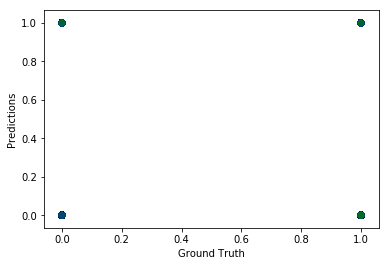

In [70]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [ ]:
# Using Count Plot

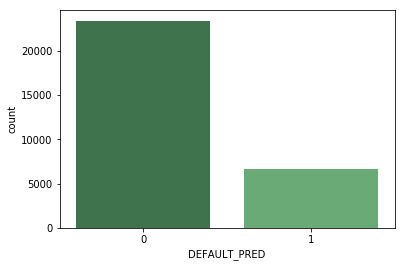

In [79]:
sns.countplot(x="DEFAULT_PRED",
 palette="Greens_d", 
 data=creditData)

In [81]:
# Try a Factor Plot

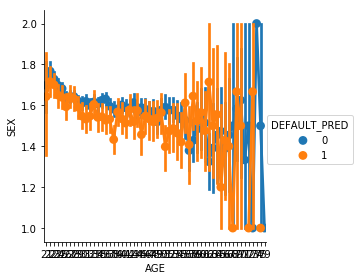

In [82]:
sns.factorplot(x="AGE", 
 y="SEX", 
 hue="DEFAULT_PRED",
 data=creditData) 

In [83]:
# Let's add age buckets and make it clearer
# Not too late, is it? Guess we'll find out!

In [87]:
custom_bucket_array = ([20, 29, 39, 49, 59, 69, 80 ])
custom_bucket_array

[20, 29, 39, 49, 59, 69, 80]

In [88]:
creditData['AGE_LABEL'] = pd.cut(creditData['AGE'], custom_bucket_array, labels=["20", "30", "40", "50", "60", "70"])
creditData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PRED,AGE_LABEL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,20
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50


In [89]:
# Try that Factor Plot again

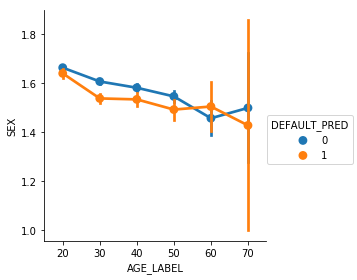

In [96]:
sns.factorplot(x="AGE_LABEL", 
 y="SEX", 
 hue="DEFAULT_PRED",
 data=creditData) 

In [97]:
# These two plots don't really make sense because SEX should be only 1 or 2/ Male or Female
# I suppose I could go back to the data set, change that in the spreadsheet
# But I don't have the time
# Will remember in future
# I feel like I'm going backwards. I should be plotting the test results.

In [103]:
# Wound up using Decision Tree for classification
# Let's see if I can do a basic Decision Tree plot
# following code from here: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(creditData,creditData.DEFAULT_PRED)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [139]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
# Error
# Who stole pydot plus?
# Carmen Sandiego? 
# ---------------------------------------------------------------------------
# ModuleNotFoundError                       Traceback (most recent call last)
# <ipython-input-139-2560093d3401> in <module>()
#      2 from IPython.display import Image
#      3 from sklearn.tree import export_graphviz
# ----> 4 import pydotplus

# ModuleNotFoundError: No module named 'pydotplus'

In [140]:
# Try Code anyway

In [142]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [ ]:
# pydotplus apparently doesn't exist 
# Error don't lie
# Although all resources say pydotplus is real
# Brigadoon of code?
# Will try an alternate version of code from another source
# https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

In [138]:
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=creditData.head[1:27],  
                                class_names=creditData.DEFAULT_PRED)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

TypeError: 'method' object is not subscriptable

In [130]:
# Error
# Has to be the 10th Error. I feel like I'm getting closer but it STILL doesn't want to give me a Decision Tree Plot
# Which is annoying because I'd really like to do one


# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-125-880f1e0bc87e> in <module>()
#      2 dot_data = tree.export_graphviz(dtree, out_file=None, 
#      3                                 feature_names=creditData.columns,
# ----> 4                                 class_names=creditData.DEFAULT_PRED)
#      5 
#      6 # Draw graph

# /anaconda3/lib/python3.6/site-packages/sklearn/tree/export.py in export_graphviz(decision_tree, out_file, max_depth, feature_names, class_names, label, filled, leaves_parallel, impurity, node_ids, proportion, rotate, rounded, special_characters, precision)
#    462             recurse(decision_tree, 0, criterion="impurity")
#    463         else:
# --> 464             recurse(decision_tree.tree_, 0, criterion=decision_tree.criterion)
#    465 
#    466         # If required, draw leaf nodes at same depth as each other

# /anaconda3/lib/python3.6/site-packages/sklearn/tree/export.py in recurse(tree, node_id, criterion, parent, depth)
#    330             out_file.write('%d [label=%s'
#    331                            % (node_id,
# --> 332                               node_to_str(tree, node_id, criterion)))
#    333 
#    334             if filled:

# /anaconda3/lib/python3.6/site-packages/sklearn/tree/export.py in node_to_str(tree, node_id, criterion)
#    300                                           np.argmax(value),
#    301                                           characters[2])
# --> 302             node_string += class_name
#    303 
#    304         # Clean up any trailing newlines

# TypeError: must be str, not numpy.int64

In [136]:
# And Error #11
# For Good Measure

# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-128-b010bcb69874> in <module>()
#      2 dot_data = tree.export_graphviz(dtree, out_file=None, 
#      3                                 feature_names=creditData.head(),
# ----> 4                                 class_names=creditData.DEFAULT_PRED)
#      5 
#      6 # Draw graph

# /anaconda3/lib/python3.6/site-packages/sklearn/tree/export.py in export_graphviz(decision_tree, out_file, max_depth, feature_names, class_names, label, filled, leaves_parallel, impurity, node_ids, proportion, rotate, rounded, special_characters, precision)
#    427                                  "does not match number of features, %d"
#    428                                  % (len(feature_names),
# --> 429                                     decision_tree.n_features_))
#    430 
#    431         # The depth of each node for plotting with 'leaf' option

# ValueError: Length of feature_names, 5 does not match number of features, 26

In [ ]:
# And Error #12
# I give up
# It is what it is

# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-135-aad0d0803378> in <module>()
#      1 # Create DOT data
#      2 dot_data = tree.export_graphviz(dtree, out_file=None, 
# ----> 3                                 feature_names=creditData.head[1:27],
#       4                                 class_names=creditData.DEFAULT_PRED)
#      5 

# TypeError: 'method' object is not subscriptable